In [30]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [31]:
EPS = 1e-4
RESULTS_DIR = os.path.join(os.getcwd(), "results")
CROWSPAIRS_RESULTS_DIR = os.path.join(RESULTS_DIR, "crowspairs")

In [32]:
def compare_models(results_list, compare_lr=None, baseline=None, title="F1 Score by Layer"):
    results_dir = os.path.join(os.getcwd(), "results")
    for result in results_list:
        result_dir = os.path.join(results_dir, result)
        ccs_f1s = np.load(os.path.join(result_dir, "ccs_f1s.npy"))
        plt.scatter(range(len(ccs_f1s)), ccs_f1s, label=result)
        #plt.plot(range(len(ccs_f1s)), ccs_f1s)

    if compare_lr:
        result_dir = os.path.join(os.getcwd(), f"results/{compare_lr}")
        lr_f1s = np.load(os.path.join(result_dir, "lr_f1s.npy"))
        plt.plot(range(len(lr_f1s)), lr_f1s, label=f"{compare_lr} LR baseline", color="pink")

    ax = plt.gca()
    ax.legend(bbox_to_anchor=(1.05, 1))

    if baseline:
        plt.axhline(y=baseline, color="pink", linestyle="-")
    # Set range
    plt.ylim(0, 1)
    plt.title(title)
    plt.xlabel("Layer")
    plt.ylabel("F1 Score")

    plt.show()

In [33]:
def plot_lr_ccs_diffs(results_list, baseline=None, title="Lr vs. CCS F1 Difference by Layer"):
    results_dir = os.path.join(os.getcwd(), "results")
    for result in results_list:
        result_dir = os.path.join(results_dir, result)
        lr_f1s = np.load(os.path.join(result_dir, "lr_f1s.npy"))
        ccs_f1s = np.load(os.path.join(result_dir, "ccs_f1s.npy"))
        diff_f1s = lr_f1s - ccs_f1s
        plt.scatter(range(len(diff_f1s)), diff_f1s, label=result)

    ax = plt.gca()
    ax.legend(bbox_to_anchor=(1.05, 1))

    if baseline:
        plt.axhline(y=baseline, color="pink", linestyle="-")
    # Set range
    plt.ylim(0, 1)
    plt.title(title)
    plt.xlabel("Layer")
    plt.ylabel("LR F1 - CCS F1")

    plt.show()

In [34]:
def single_model_all_domains(model_name, filters, baseline=0.5):
    for filter in filters:
        path = os.path.join(CROWSPAIRS_RESULTS_DIR, f"{filter}/{model_name}")
        ccs_f1s = np.load(os.path.join(path, "ccs_f1s.npy"))

        plt.scatter(range(len(ccs_f1s)), ccs_f1s, label=filter)

    ax = plt.gca()
    ax.legend(bbox_to_anchor=(1.05, 1))

    if baseline:
        plt.axhline(y=baseline, color="pink", linestyle="-")

    plt.ylim(0, 1)
    plt.title(f"{model_name} f1 scores across all domains")
    plt.xlabel("Layer")
    plt.ylabel("CCS F1")

    plt.show()

In [35]:
def barchart_all_domains(model_name, filters):
    max_f1s = []
    for filter in filters:
        path = os.path.join(CROWSPAIRS_RESULTS_DIR, f"{filter}/{model_name}")
        ccs_f1s = np.load(os.path.join(path, "ccs_f1s.npy"))
        max_f1s.append(ccs_f1s.max())
    plt.bar(filters, max_f1s)
    plt.ylim(0, 1)
    plt.xticks(rotation=90)
    plt.title(f"{model_name} best f1 by domain")
    plt.xlabel("Domain")
    plt.ylabel("F1 score")

    plt.show()

In [36]:
gpt2_models = ["gpt2", "gpt2-medium", "gpt2-large", "gpt2-xl"]
roberta_models = ["roberta-base", "roberta-large"]
flan_t5_models = ["flan-t5-small", "flan-t5-base", "flan-t5-large"]
FILTERS = ["age", "disability", "gender", "nationality", "physical-appearance", "race-color", "religion", "sexual-orientation", "socioeconomic"]

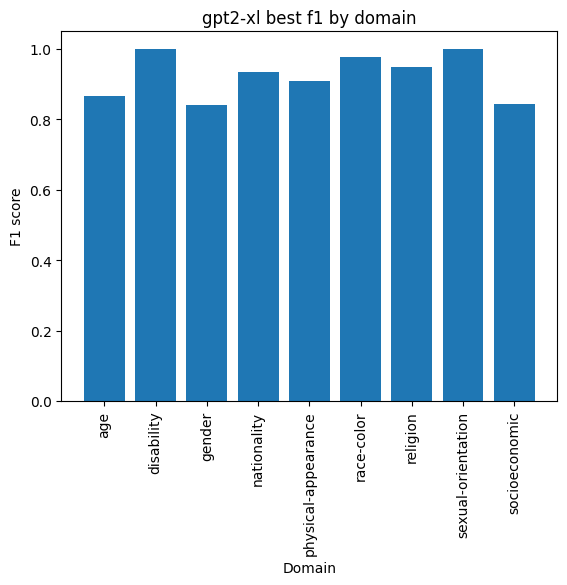

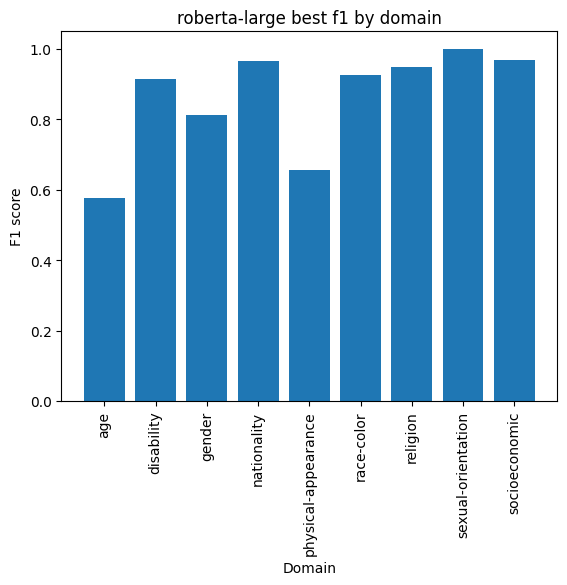

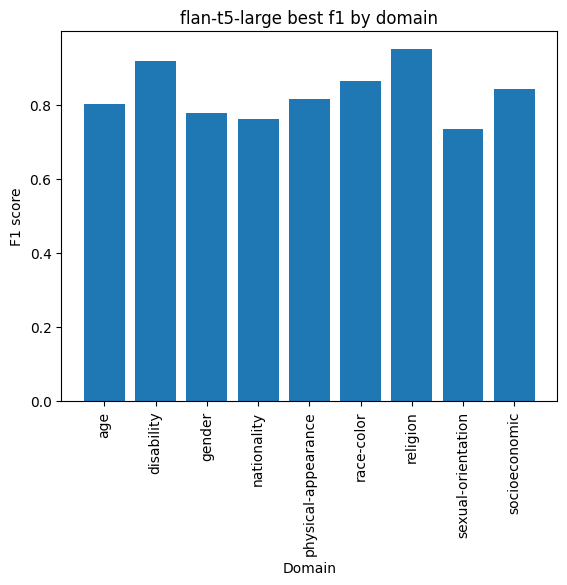

In [37]:
barchart_all_domains("gpt2-xl", FILTERS)
barchart_all_domains("roberta-large", FILTERS)
barchart_all_domains("flan-t5-large", FILTERS)